In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
dataset=pd.read_csv("loan_data_set.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [13]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# dtecting outliers in dataset

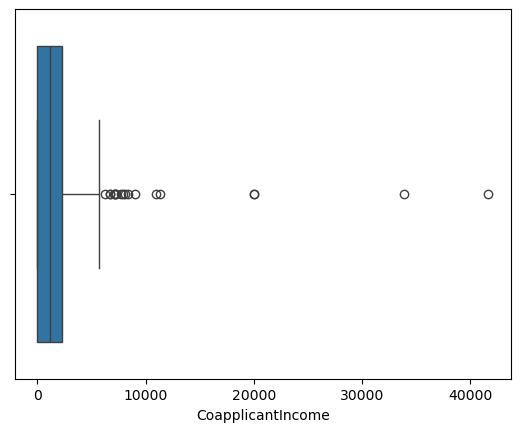

In [15]:
sns.boxplot(x="CoapplicantIncome" ,data=dataset)
plt.show()

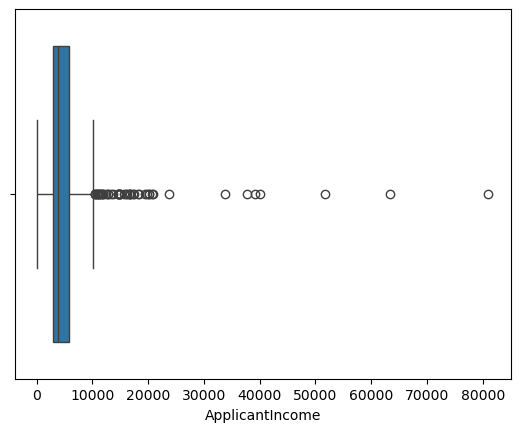

In [17]:
sns.boxplot(x="ApplicantIncome" ,data=dataset)
plt.show()

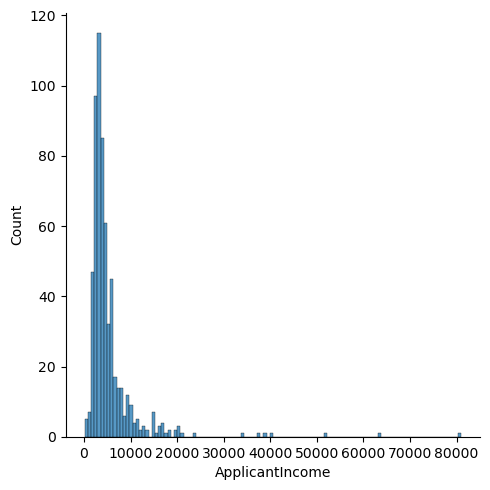

In [19]:
sns.displot(dataset["ApplicantIncome"])
plt.show()

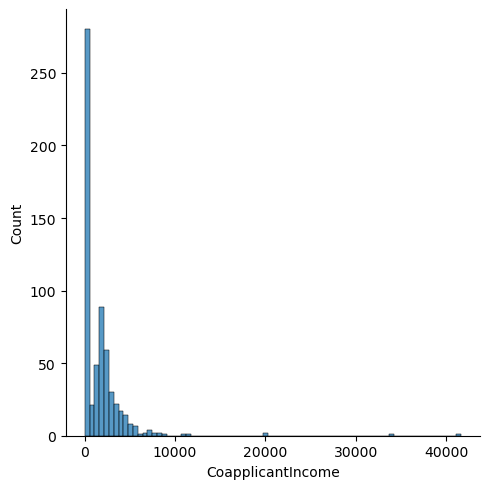

In [21]:
sns.displot(dataset["CoapplicantIncome"])
plt.show()

In [23]:
# roemoving outlies though IQR

In [25]:
dataset.shape

(614, 13)

In [31]:
q1=dataset["CoapplicantIncome"].quantile(0.25)
q3=dataset["CoapplicantIncome"].quantile(0.75)
q1,q3

(0.0, 2297.25)

In [35]:
IQR=q3-q1
IQR

2297.25

In [42]:
min_range=q1-(1.5*IQR)
max_range=q3+(1.5*IQR)
min_range,max_range

(-3445.875, 5743.125)

In [46]:
dataset[dataset["CoapplicantIncome"]<=max_range]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [48]:
#saving dataset in new variable

In [50]:
new_data=dataset[dataset["CoapplicantIncome"]<=max_range]

In [54]:
new_data.shape

(596, 13)

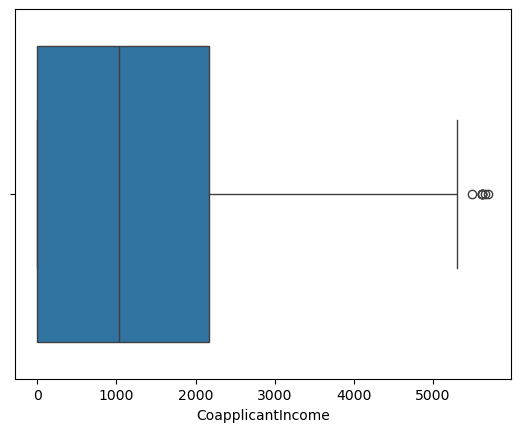

In [58]:
sns.boxplot(x="CoapplicantIncome" ,data=new_data)
plt.show()

In [60]:
#removing outliers using z-score

In [62]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

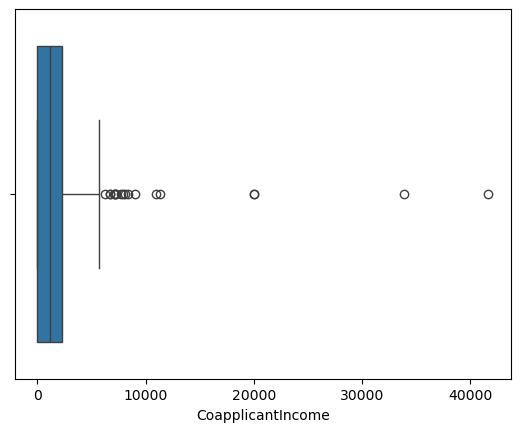

In [64]:
sns.boxplot(x="CoapplicantIncome" ,data=dataset)
plt.show()

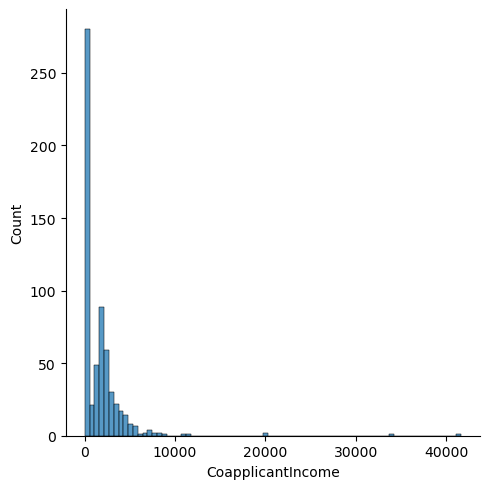

In [66]:
sns.displot(dataset["CoapplicantIncome"])
plt.show()

In [68]:
z_score=(dataset["CoapplicantIncome"]-dataset["CoapplicantIncome"].mean())/(dataset["CoapplicantIncome"].std())

In [72]:
z_score>3

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Name: CoapplicantIncome, Length: 614, dtype: bool

In [74]:
dataset["z_score"]=z_score

In [80]:
dataset[dataset["z_score"]<3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.554036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.554036
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.554036
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,-0.472019
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,-0.554036


In [ ]:
# 608 rows are remaining , previously 614 rows in data set